# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
data = pd.read_csv('./Position_Salaries.csv')

In [ ]:
data.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [ ]:
x = data.Level.values
y = data.Salary.values

In [ ]:
#             linhas, colunas
#                L  ,C
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [ ]:
print(x,"\n")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
#EM SVR escalamos também a variável dependente, mas não usaremos standard scaler para as duas
#Temos que criar um StandardScaler para x e outro para Y pois eles não compartilham os mesmos desvios padrão
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
x = Xscaler.fit_transform(x)

Yscaler = StandardScaler()
y = Yscaler.fit_transform(y)

In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR

# O Kernel recomendado para um SVR é o Radial Basis Function
# Tem VARIOOOS kerneis

regressor = SVR(kernel='rbf')
regressor.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [ ]:
#Para a predição ser mais precisa, é necessario usar o metodo transform do scaler para 
#escalar os dados a serem advinhados
#NAO USAR FIT_TRANSFORM, o fit é para TREINAR o modelo

#Para reverter a escala utilizada pelo scaler utilizamos o metodo inverse_transform do Yscaler
#Utilizamos o Yscaler pois ele devolve o resultado como Y 

Yscaler.inverse_transform(regressor.predict(Xscaler.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

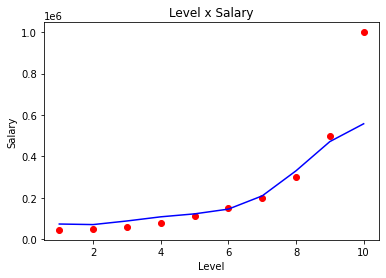

In [ ]:
plt.scatter( Xscaler.inverse_transform(x) , Yscaler.inverse_transform(y), color='red')
plt.plot(Xscaler.inverse_transform(x), Yscaler.inverse_transform(regressor.predict(x)), color='blue')
plt.title('Level x Salary')
plt.xlabel('Level')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

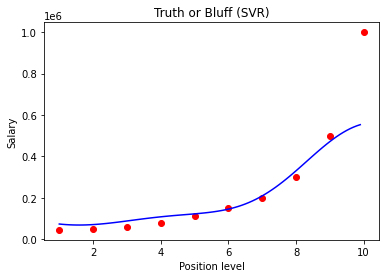

In [ ]:
sc_X = Xscaler
sc_y = Yscaler
X = x
Y = y

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()